In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data, predict_with_timestamps
from epf.config import PROCESSED_DATA_DIR, FeatureConfig

2025-05-16 10:57:10.937 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-16 10:57:10.937 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [2]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

# avg Weekly volatility de lu prices

In [ ]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [ ]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

In [ ]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

#plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

# Normed features

In [3]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [10]:
df_std

,de_gas_gen_rm_seasonal,de_hard_coal_gen_rm_seasonal,de_lignite_gen_rm_seasonal,de_solar_gen_rm_seasonal,de_wind_gen_offshore_rm_seasonal,de_wind_gen_onshore_rm_seasonal,de_load_rm_seasonal,ch_prices_hat_rm_seasonal,de_prices_hat_rm_seasonal,dk1_prices_hat_rm_seasonal,dk2_prices_hat_rm_seasonal,fr_prices_hat_rm_seasonal
timestamp,,,,,,,,,,,,
2022-12-31 23:00:00+00:00,2398.962574,4346.000552,7149.331330,1560.567219,3148.009145,25260.698843,49594.451017,31.060762,59.237365,69.625022,79.878606,64.683394
2023-01-01 00:00:00+00:00,2430.104250,4415.371981,7080.911332,1547.539673,3591.873149,25306.120266,50014.050326,33.219155,64.515174,72.975606,82.494844,71.772860
2023-01-01 01:00:00+00:00,2416.035478,4498.871968,7078.608616,1535.775695,4010.209664,25304.884310,50142.277158,39.263156,66.723422,74.062323,84.075513,73.964489
2023-01-01 02:00:00+00:00,2382.670094,4540.044861,7129.434030,1523.803477,3972.811395,25285.956764,49946.634612,43.120039,68.004958,77.369882,86.659602,78.940550
2023-01-01 03:00:00+00:00,2411.335748,4580.350475,7221.594894,1513.976113,3918.557942,25102.525001,49486.383369,53.405810,69.209481,77.768006,88.779323,80.030259
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,7539.317886,3420.089977,6166.039235,1950.192657,2299.244370,27693.633796,49817.303171,119.638457,64.607452,36.456318,32.853733,83.253990
2024-12-31 19:00:00+00:00,6988.208465,3460.616383,5909.408505,1950.508512,2104.382148,28256.435057,49814.889987,119.704207,58.221412,32.833589,32.752820,84.644232
2024-12-31 20:00:00+00:00,6880.665726,3484.750453,5128.262152,1953.608869,2212.570301,28690.310273,49803.040443,121.277820,56.674892,33.482019,33.426614,86.399321


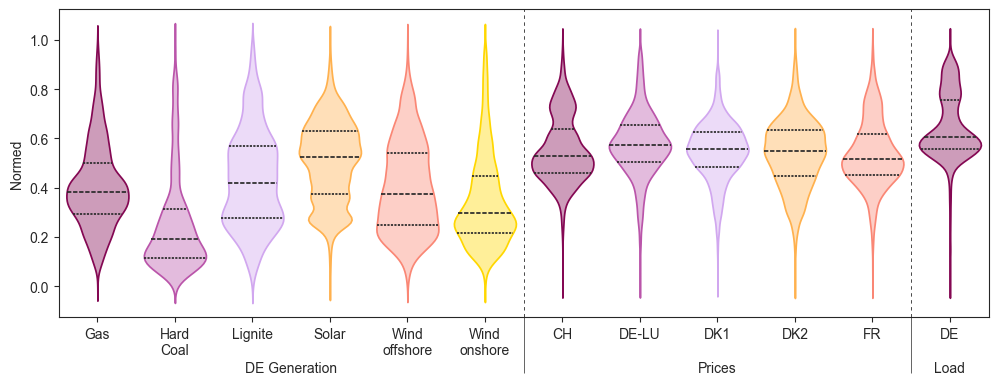

In [19]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'de_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal', 'de_load_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],

    # third palette
    'de_load_rm_seasonal': COLORS['magenta'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',

    # third labels
    'de_load_rm_seasonal': 'DE',
}

train_min = train_df.min()
train_max = train_df.max()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_min) / (train_max - train_min)
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=train_df, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels([labels[col] for col in train_df.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 10.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 8, 11], labels=['\nDE Generation', '\nPrices', '\nLoad'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 10.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution.pdf", dpi=300, bbox_inches='tight')

plt.show()

# Metrics

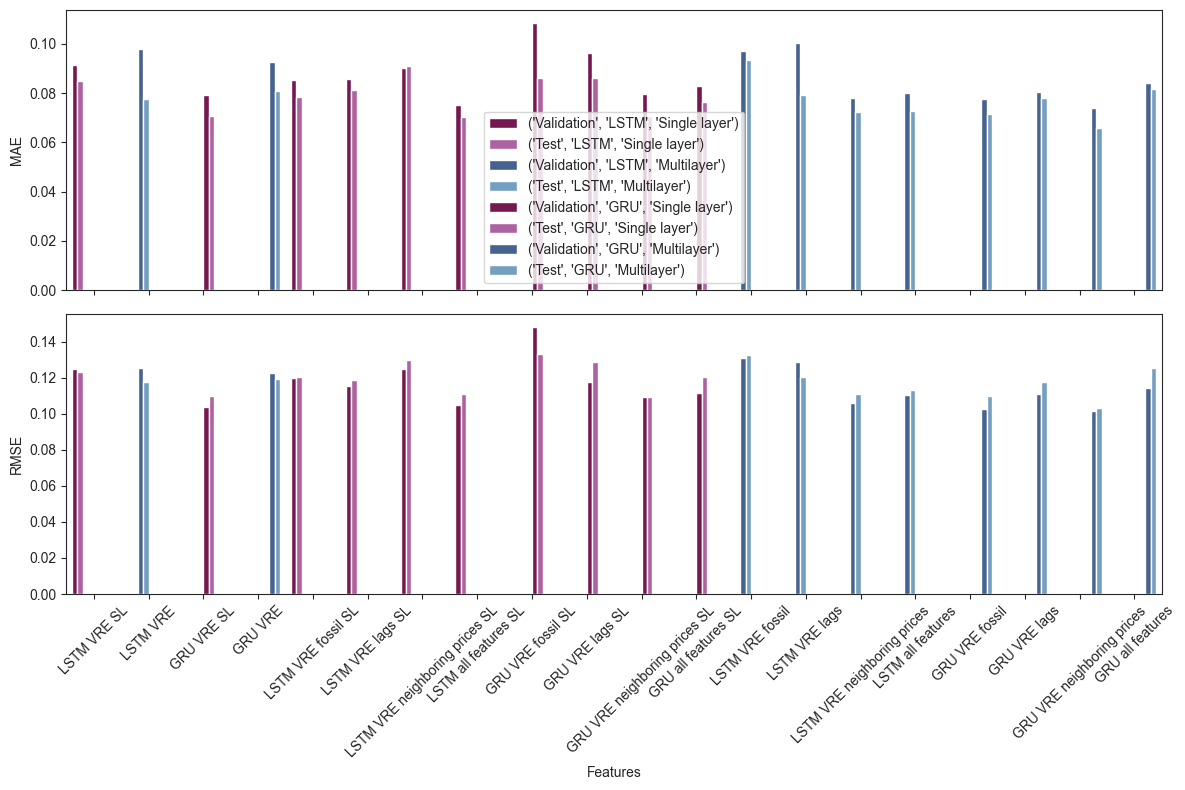

In [55]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

with open("../data/processed/val_performance.pkl", "rb") as f:
    val_performance = pkl.load(f)

models = {
    # VRE
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre': 'LSTM VRE',
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre': 'GRU VRE',

    # explanatory variables sl
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

palette = {
    ('Validation', 'LSTM', 'Single layer'): COLORS['magenta'],
    ('Test', 'LSTM', 'Single layer'): COLORS['purple'],

    ('Validation', 'LSTM', 'Multilayer'): COLORS['blue'],
    ('Test', 'LSTM', 'Multilayer'): COLORS['blue_grey'],

    ('Validation', 'GRU', 'Single layer'): COLORS['magenta'],
    ('Test', 'GRU', 'Single layer'): COLORS['purple'],

    ('Validation', 'GRU', 'Multilayer'): COLORS['blue'],
    ('Test', 'GRU', 'Multilayer'): COLORS['blue_grey'],
}

metrics = {'mean_absolute_error':'MAE', 'root_mean_squared_error':'RMSE'}

data = []
for model_key, model_name in models.items():
    for metric, name in metrics.items():
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Validation',
            'Value': val_performance[model_key][metric],
            'Layer': 'LSTM' if 'lstm' in model_key else 'GRU',
            'Architecture': 'Single layer' if model_key.endswith('_sl') else 'Multilayer'
        })
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Test',
            'Value': performance[model_key][metric],
            'Layer': 'LSTM' if 'lstm' in model_key else 'GRU',
            'Architecture': 'Single layer' if model_key.endswith('_sl') else 'Multilayer'
        })

df = pd.DataFrame(data)

sns.set_style('ticks')
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)), sharex=True)

for i, (metric_key, metric_name) in enumerate(metrics.items()):
    sns.barplot(
        data=df[df['Metric'] == metric_name],
        x='Model',
        y='Value',
        hue=df[['Dataset', 'Layer', 'Architecture']].apply(tuple, axis=1),
        palette=palette,
        ax=axes[i],
        dodge=True
    )
    axes[i].set_ylabel(metric_name)
    axes[i].set_xlabel('Features')
    plt.xticks(rotation=45)

    if i == 0:
        axes[i].legend()
    else:
        axes[i].legend().remove()

plt.tight_layout()
plt.show()

In [63]:
rounded_errors = {}

for model_key, metrics in performance.items():
    rounded_errors[model_key] = {metric: round(value, 4) for metric, value in metrics.items()}

print(rounded_errors)

{'gru_vre': {'loss': 0.0808, 'mean_absolute_error': 0.0808, 'root_mean_squared_error': 0.1196}, 'lstm_vre': {'loss': 0.0774, 'mean_absolute_error': 0.0774, 'root_mean_squared_error': 0.1177}, 'lstm_vre_fossil': {'loss': 0.0935, 'mean_absolute_error': 0.0935, 'root_mean_squared_error': 0.1327}, 'gru_vre_fossil': {'loss': 0.0715, 'mean_absolute_error': 0.0715, 'root_mean_squared_error': 0.1097}, 'gru_vre_lags': {'loss': 0.0779, 'mean_absolute_error': 0.0779, 'root_mean_squared_error': 0.1174}, 'lstm_vre_lags': {'loss': 0.0792, 'mean_absolute_error': 0.0792, 'root_mean_squared_error': 0.1204}, 'lstm_vre_lags_sl': {'loss': 0.0814, 'mean_absolute_error': 0.0814, 'root_mean_squared_error': 0.119}, 'gru_vre_lags_sl': {'loss': 0.0861, 'mean_absolute_error': 0.0861, 'root_mean_squared_error': 0.129}, 'gru_vre_sl': {'loss': 0.0707, 'mean_absolute_error': 0.0707, 'root_mean_squared_error': 0.1101}, 'lstm_all_features': {'loss': 0.0728, 'mean_absolute_error': 0.0728, 'root_mean_squared_error': 0.1

### naive forecast

In [88]:
from sktime.forecasting.naive  import NaiveForecaster
from sktime.forecasting.stream import UpdateEvery

with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
test_df = model_obj['test_df']

train_df.index = train_df.index.to_period(freq='1h')
test_df.index = test_df.index.to_period(freq='1h')

naive = UpdateEvery(NaiveForecaster(strategy="last", sp=24), 168)

y = train_df['de_prices_hat_rm_seasonal']
X = train_df.drop(columns=['de_prices_hat_rm_seasonal'])
X_pred = test_df['de_prices_hat_rm_seasonal']

naive.fit(y=y, fh=24, X=X)
naive.update_predict(y=y, X=X)


C:\Users\valen\AppData\Local\Temp\ipykernel_20848\3430178434.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  train_df.index = train_df.index.to_period(freq='1h')
C:\Users\valen\AppData\Local\Temp\ipykernel_20848\3430178434.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  test_df.index = test_df.index.to_period(freq='1h')
C:\Users\valen\PycharmProjects\epf\.venv\Lib\site-packages\sktime\forecasting\base\_base.py:2175: UserWarning: NotImplementedWarning: NaiveForecaster does not have a custom `update` method implemented. NaiveForecaster will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(
C:\Users\valen\PycharmProjects\epf\.venv\Lib\site-packages\sktime\forecasting\base\_base.py:2175: UserWarning: NotImplementedWarning: NaiveForecaster does not have a custom `update` metho

KeyboardInterrupt: 

### absolute error over time

retrieve the predictions, maybe group them by day/week/month to see error at different points in time

In [4]:
import pandas as pd
import pickle as pkl
from epf.util import predict_with_timestamps
from datetime import datetime, timezone
import matplotlib.pyplot as plt

with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

window = model_obj['window']
test_df = model_obj['test_df']
model = model_obj['best_model']

df_preds, df_trues = predict_with_timestamps(model, window.test_ts, label_columns=window.label_columns)

2025-05-14 16:30:48.889 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-14 16:30:48.889 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [5]:
df_preds.set_index('timestamp', inplace=True)
df_trues.set_index('timestamp', inplace=True)

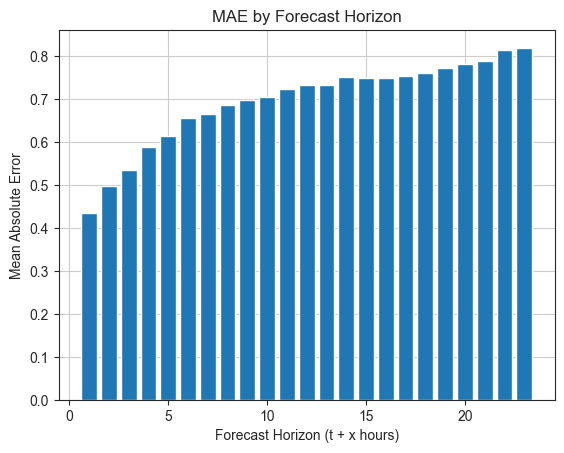

In [6]:
import numpy as np

mae_per_horizon = np.mean(np.abs(df_trues.iloc[:, 1:].values - df_preds.iloc[:, 1:].values), axis=0)

plt.bar(range(1, 24), mae_per_horizon)
plt.xlabel("Forecast Horizon (t + x hours)")
plt.ylabel("Mean Absolute Error")
plt.title("MAE by Forecast Horizon")
plt.grid(True)
plt.show()

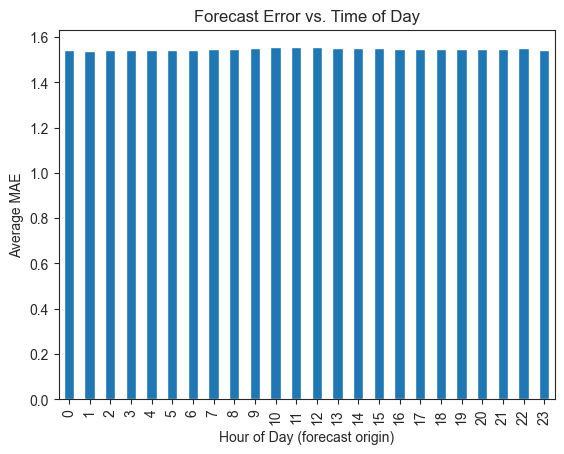

In [7]:
df_errors = df_preds.copy()
df_errors.iloc[:, 1:] = np.abs(df_preds.iloc[:, 1:] - df_trues.iloc[:, 1:])

df_errors["hour"] = df_errors.index.hour
df_errors["day"] = df_errors.index.day
df_errors["month"] = df_errors.index.month
df_errors["weekday"] = df_errors.index.weekday + 1
hourly_mae = df_errors.groupby("hour").mean().mean(axis=1)

sns.set_style('ticks')

hourly_mae.plot(kind="bar")
plt.xlabel("Hour of Day (forecast origin)")
plt.ylabel("Average MAE")
plt.title("Forecast Error vs. Time of Day")
plt.show()

In [8]:
import pandas as pd

ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ghi_avg = ghi.pivot(columns='location_id', values='shortwave_radiation (W/m²)').mean(axis=1).rename('ghi_avg')
ws_avg = ws.pivot(columns='location_id', values='wind_speed_100m (km/h)').mean(axis=1).rename('ws_avg')
weather_df = pd.concat([ghi_avg, ws_avg], axis=1)
weather_df

,ghi_avg,ws_avg
time,,
2024-01-01 00:00:00,0.0,32.92
2024-01-01 01:00:00,0.0,32.56
2024-01-01 02:00:00,0.0,33.56
2024-01-01 03:00:00,0.0,34.30
2024-01-01 04:00:00,0.0,34.62
...,...,...
2024-12-31 19:00:00,0.0,31.30
2024-12-31 20:00:00,0.0,31.54
2024-12-31 21:00:00,0.0,33.24


In [9]:
df_errors.columns = [col.split('_')[-1] for col in df_errors.columns]
data = df_errors.join(weather_df, how='inner')
data

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,...,t+21,t+22,t+23,t+24,hour,day,month,weekday,ghi_avg,ws_avg
2024-01-02 05:00:00,-2.131261,0.621685,0.630658,0.529465,0.559760,0.408221,0.012483,0.006412,0.458472,0.731675,...,1.706635,1.395152,1.453076,1.749728,5,2,1,2,0.0,33.66
2024-01-02 06:00:00,-2.328795,0.792028,0.669633,0.517789,0.494161,0.057558,0.576256,0.739368,1.297210,1.763046,...,2.127938,1.991308,2.355885,2.684212,6,2,1,2,0.0,32.92
2024-01-02 07:00:00,-2.607297,1.126868,1.148835,0.824676,0.793999,0.034013,1.026866,1.228525,2.064729,2.304101,...,1.878717,2.127406,2.611059,2.063241,7,2,1,2,0.0,33.92
2024-01-02 08:00:00,-2.251823,0.926942,0.995382,0.583359,0.477264,0.547688,1.586226,1.952989,2.704807,2.901565,...,2.169759,2.578449,2.229243,1.966971,8,2,1,2,2.4,35.38
2024-01-02 09:00:00,-2.150293,1.048663,1.075156,0.545358,0.304944,0.862801,2.116353,2.393741,3.242674,3.288362,...,2.448439,2.054535,2.019824,2.143526,9,2,1,2,14.6,35.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 19:00:00,0.440037,0.240436,0.250726,0.586754,0.983892,0.926995,0.839585,0.867950,0.905093,1.074180,...,1.564056,1.571700,1.572193,1.637247,19,30,12,1,0.0,22.06
2024-12-30 20:00:00,0.434082,0.219632,0.575112,0.928685,0.894613,0.777028,0.780980,0.805722,0.984009,1.244838,...,1.534354,1.538122,1.626594,1.800325,20,30,12,1,0.0,22.40
2024-12-30 21:00:00,0.422987,0.573505,0.953577,0.889416,0.800681,0.781568,0.773314,0.934431,1.199481,1.270876,...,1.508887,1.610821,1.801841,1.826097,21,30,12,1,0.0,22.78
2024-12-30 22:00:00,0.425252,0.949830,0.906974,0.782753,0.792048,0.767260,0.895494,1.143075,1.226038,1.403444,...,1.610716,1.819343,1.859371,1.774449,22,30,12,1,0.0,22.92


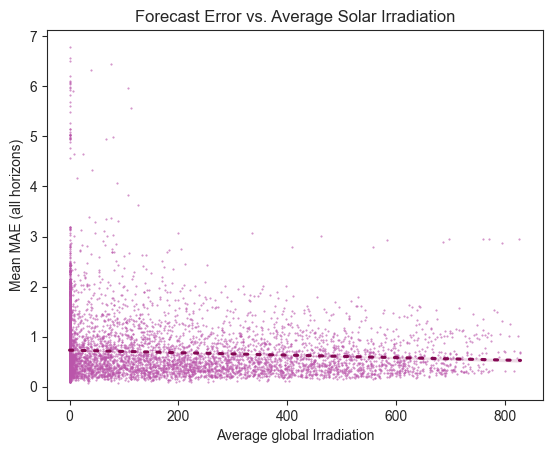

In [10]:
data["mean_mae"] = data.iloc[:, 1:24].mean(axis=1)

sns.set_style('ticks')

sns.regplot(data, x='ghi_avg', y='mean_mae', marker='.',
            scatter_kws={'color': COLORS['purple'], 'alpha': 0.7, 's': 1},
            line_kws={'color': COLORS['magenta'], 'dashes': [1,3], 'dash_capstyle': 'round'})
plt.xlabel("Average global Irradiation")
plt.ylabel("Mean MAE (all horizons)")
plt.title("Forecast Error vs. Average Solar Irradiation")
plt.show()

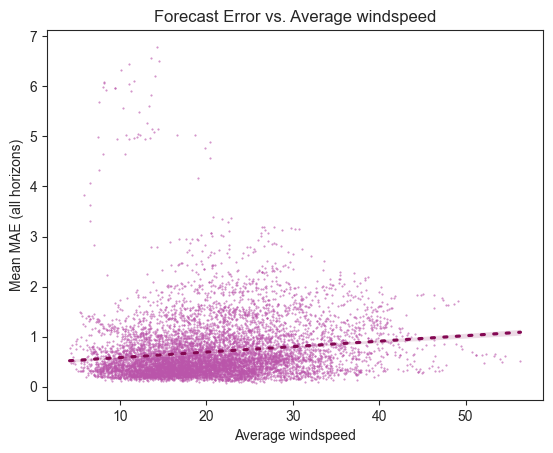

In [11]:
sns.regplot(data, x='ws_avg', y='mean_mae', marker='.',
            scatter_kws={'color': COLORS['purple'], 'alpha': 0.7, 's': 1},
            line_kws={'color': COLORS['magenta'], 'dashes': [1,3], 'dash_capstyle': 'round'})

sns.set_style('ticks')

plt.xlabel("Average windspeed")
plt.ylabel("Mean MAE (all horizons)")
plt.title("Forecast Error vs. Average windspeed")
plt.show()

### timings

In [106]:
import pickle as pkl
import json

models = {
    # VRE
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre': 'LSTM VRE',
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre': 'GRU VRE',

    # explanatory variables sl
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

for model_key, model_name in models.items():
    path = f"../models/{model_key}.pkl"
    with open(path, "rb") as f:
        models.update({model_key: pkl.load(f)})

timings = {}

for model_key, model_obj in models.items():
    timings.update({model_obj['model_name']: model_obj['timings']})

with open('../models/timings.json', 'w') as f:
    json.dump(timings, f)